In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
#read data, and generate basic info
unclean = pd.read_csv('../UM.csv').copy()
print(unclean.head())
print(unclean.shape)
print(unclean.info())

   Number          Primary UMSCUMCC  Age_at_dx     Sex Durationofsymptoms  \
0   13544  First incidence     UMMC         39  female                  1   
1   13001  First incidence     SDMC         33  female                  8   
2   10450  First incidence     UMMC         60  female                0.5   
3   28149  First incidence     UMMC         66  female                  1   
4   26091  First incidence     UMMC         49  female                NaN   

  Marital_status  Age_at_first_child_birth          Meno_stat famhist  ...  \
0        married                      26.0                NaN      no  ...   
1        married                      32.0       Premenopause      no  ...   
2    not married                       NaN  Natural menopause      no  ...   
3        married                      27.0  Natural menopause      no  ...   
4            NaN                       NaN       Premenopause      no  ...   

   Chemotherapy                  Regime Regional_nodes_examined  \
0

In [3]:
#Primary
recode1 = {'First incidence': 1, 'Previous breast cancer': 2}
unclean['Primary'] = unclean['Primary'].map(recode1).astype('category')


In [4]:
#2 - UMSCUMCC 
recode2 = {'UMMC': 1, 'SDMC': 2, 'UMSC':3}
unclean['UMSCUMCC'] = unclean['UMSCUMCC'].map(recode2).astype('category')

In [5]:
#3 - Age_at_dx
unclean['Age_at_dx'] = pd.to_numeric(unclean['Age_at_dx'],errors='coerce')

In [6]:
#4 - Sex 
recode4 = {'female': 1, 'male': 2}
unclean['Sex'] = unclean['Sex'].map(recode4).astype('category')

In [7]:
#5 not doing duration as it is far too messy! (see clean_old and models_old for info on this)

In [8]:
#6 - Marital_status 
recode6 = {'married': 1, 'not married': 0}
unclean['Marital_status'] = unclean['Marital_status'].map(recode6).astype('category')

In [9]:
#7 Age at first child is weird, the data goes to 99...this is immpossible

In [10]:
#8 #8 - Meno_stat 
recode8 = {'Premenopause': 1, 'Natural menopause': 2, 'Surgical menopause': 3}
unclean['Meno_stat'] = unclean['Meno_stat'].map(recode8).astype('category')

In [11]:
#9 - famhist (739 blank)
recode9 = {'no': 0, 'yes': 1}
unclean['famhist'] = unclean['famhist'].map(recode9).astype('category')

In [12]:
#10 - Nationality
recode10 = {'Malaysian': 1, 'Others': 2}
unclean['Nationality'] = unclean['Nationality'].map(recode10).astype('category')

In [13]:
#11 - Race
recode11 = {'Malay': 1, 'Chinese': 2, 'India': 3, 'Others': 4}
unclean['Race'] = unclean['Race'].map(recode11).astype('category')

In [14]:
#12 - diagnosis
recode12 = {'excision': 1, 'FNAC': 2, 'imaging only': 3, 'trucut': 4, 'other': 5}
unclean['diagnosis'] = unclean['diagnosis'].map(recode12).astype('category')

In [15]:
#13 - Classification 
recode13 = {'In situ': 1, 'Invasive': 2}
unclean['Classification'] = unclean['Classification'].map(recode13).astype('category')

In [16]:
#14 - Laterality 
recode14 = {'Bilateral': 1, 'Left': 2, 'Right': 3, 'Unilateral side unknown': 4}
unclean['Laterality'] = unclean['Laterality'].map(recode14).astype('category')

In [17]:
#15 - AJCC6complete 
unclean['AJCC6complete'] = unclean['AJCC6complete'].astype('category')

In [18]:
#16 - STAGEAJCC6 
recode16 = {'Stage 0': 0, 'Stage 1': 1, 'Stage 2': 2, 'Stage 3': 3, 'Stage 4': 4}
unclean['STAGEAJCC6'] = unclean['STAGEAJCC6'].map(recode16).astype('category')

In [19]:
#17 - Differentiation 
recode17 = {'poor differentiation': 1, 'Moderate differentiation': 2, 'Good differentiation': 3}
unclean['Differentiation'] = unclean['Differentiation'].map(recode17).astype('category')

In [20]:
#18 - Tumor_size 
unclean['Tumor_size'] = pd.to_numeric(unclean['Tumor_size'],errors='coerce')

In [21]:
#19 - ER_status
recode19 = {'Positive': 1, 'Negative': 2}

unclean['ER_status'].replace('unknown',np.NaN)
unclean['ER_status'] = unclean['ER_status'].map(recode19).astype('category')

In [22]:
#20 - PR_status 
recode20 = {'Positive': 1, 'Negative': 2}

unclean['PR_status'].replace('unknown',np.NaN)
unclean['PR_status'] = unclean['PR_status'].map(recode20).astype('category')

In [23]:
#21 - CERB2_status (1549 blanks)
recode21 = {'Positive': 1,'Negative': 2, 'Equivocal': 3}
unclean['CERB2_status'] = unclean['CERB2_status'].map(recode21).astype('category')

In [24]:
#22 - Pri_Rx 
recode22 = {'Surgery': 1, 'Chemotherapy': 2,'Hormone therapy': 3, 'Others': 4, 'None': 5}
unclean['Pri_Rx'] = unclean['Pri_Rx'].map(recode22).astype('category')

In [25]:
#23 - Surgery (36 blanks)
recode23 = { 'No surgery': 0, 'surgery done': 1, 'Defaulted': 2}
unclean['Surgery'] = unclean['Surgery'].map(recode23).astype('category')

In [26]:
#24 - Surgery_type (98 blanks)
recode24 = {'Mastectomy': 1, 'Breast conserving surgery': 2, 'No surgery': 3}
unclean['Surgery_type'] = unclean['Surgery_type'].map(recode24).astype('category')

In [27]:
#25 - Axill_dissect (676 blanks)
recode25 = {'Yes': 1, 'None': 2, 'SLNB': 3, 'SLNB TO AC': 4}
unclean['Axill_dissect'] = unclean['Axill_dissect'].map(recode25).astype('category')

In [28]:
#26 date_surg - not needed

In [29]:
#27 - Radiotherapy (1122 blanks)
recode26 = {'No radiotherapy': 0, 'Radiotherapy': 1}
unclean['Radiotherapy'] = unclean['Radiotherapy'].map(recode26).astype('category')

In [30]:
#28 - Chemotherapy (640 blanks)
recode27 = {'No chemotherapy': 0, 'Chemotherapy': 1}
unclean['Chemotherapy'] = unclean['Chemotherapy'].map(recode27).astype('category')

In [31]:
#29 the rest of the data (aside fron Event) have too many blanks and/or are uneeded

In [32]:
#30 - Event
recode36 = {'Dead': 0, 'Alive': 1, 'Repeat pt - contralateral BC': 3, 'Repeat pt - abscond and return': 4, 'Seen in SJMCand UMMC' : 5}
unclean['Event'] = unclean['Event'].map(recode36).astype('category')

In [33]:
#check all is categorical and named correctly:
def print_all_values(df):
    for column in df.columns:
        print("--------------------- %s ---------------------" % column)
        print(df[column].value_counts())

print_all_values(unclean)


--------------------- Number ---------------------
15673    2
13409    2
13093    2
13027    2
15571    2
15680    2
14489    2
15672    2
13660    2
16148    2
13600    2
12548    2
15679    2
14563    2
13538    2
12449    2
15458    2
16145    2
12482    2
14551    2
14103    2
11270    2
11364    2
15690    2
15227    2
15213    2
15674    2
16093    2
15681    2
14482    2
        ..
29315    1
23174    1
21127    1
27272    1
25225    1
29323    1
23182    1
21135    1
27280    1
25233    1
29331    1
23190    1
21143    1
27288    1
25241    1
15002    1
29339    1
23198    1
21151    1
27296    1
25249    1
29347    1
23206    1
21159    1
27304    1
25257    1
15018    1
29355    1
23214    1
16384    1
Name: Number, Length: 8529, dtype: int64
--------------------- Primary ---------------------
1    8625
2      24
Name: Primary, dtype: int64
--------------------- UMSCUMCC ---------------------
1    5354
2    1895
3    1400
Name: UMSCUMCC, dtype: int64
--------------------- Age

Text(0.5, 0, 'Event')

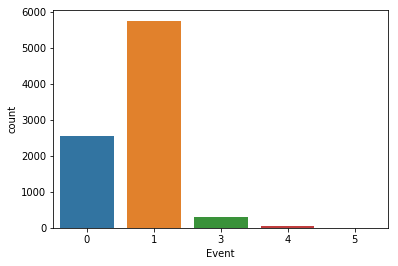

In [34]:
sns.countplot(x='Event', data=unclean)
plt.xlabel('Event')

## Get rid of all other events but dead or alive
We will also drop all na values

In [35]:
clean = unclean[['Primary','UMSCUMCC','Age_at_dx','Sex','Marital_status','Meno_stat','famhist',
                 'Nationality','Race','diagnosis','Classification','Laterality','STAGEAJCC6',
                 'Differentiation','ER_status','PR_status','CERB2_status','Pri_Rx','Surgery_type',
                 'Axill_dissect','Radiotherapy','Chemotherapy','Event']].dropna()
clean = clean[(clean['Event']==0) | (clean['Event']==1)]
clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2994 entries, 1 to 8590
Data columns (total 23 columns):
Primary            2994 non-null category
UMSCUMCC           2994 non-null category
Age_at_dx          2994 non-null int64
Sex                2994 non-null category
Marital_status     2994 non-null category
Meno_stat          2994 non-null category
famhist            2994 non-null category
Nationality        2994 non-null category
Race               2994 non-null category
diagnosis          2994 non-null category
Classification     2994 non-null category
Laterality         2994 non-null category
STAGEAJCC6         2994 non-null category
Differentiation    2994 non-null category
ER_status          2994 non-null category
PR_status          2994 non-null category
CERB2_status       2994 non-null category
Pri_Rx             2994 non-null category
Surgery_type       2994 non-null category
Axill_dissect      2994 non-null category
Radiotherapy       2994 non-null category
Chemotherapy  

In [36]:
#write newly cleaned data to file
final = clean.copy()
final.to_csv('../clean_cancer_data.csv', sep='\t',encoding='utf-8')
print(final.shape)

(2994, 23)
